In [117]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

# Exploratory Data Analysis

In [118]:
df_daily = pd.read_csv('eMAR daily consumption.csv')
display(df_daily.head())
df_house = pd.read_excel("eMARC household survey summary.xlsx")
display(df_house.head())

,Region,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh)
0,Pune city,With Air Conditioners,H002,appliance,D0003,12/22/2019,1.039917
1,Pune city,With Air Conditioners,H002,appliance,D0003,12/23/2019,0.930054
2,Pune city,With Air Conditioners,H002,appliance,D0003,12/24/2019,1.059936
3,Pune city,With Air Conditioners,H002,appliance,D0003,12/25/2019,1.270020
4,Pune city,With Air Conditioners,H002,appliance,D0003,12/26/2019,1.010010


,HHID,Region,Rooms,No. of People,Area in Sqft,Inverter,Lights,Ceiling Fans,Air Coolers,Air-Conditioners,Fridge,TV,Water heaters,Washing Machine,Mixer,Iron,Micro-wave
0,H001,Pune city,3.0,3,625.0,0.0,19,3,0,0.0,1,1,0,1,1,1,1
1,H002,Pune city,5.0,4,1100.0,0.0,14,5,0,3.0,1,1,1,1,1,1,1
2,H003,Pune city,5.0,2,1000.0,0.0,16,6,0,0.0,1,1,3,1,1,1,1
3,H004,Pune city,3.0,7,550.0,0.0,10,2,0,0.0,1,1,1,1,1,1,1
4,H005,Pune city,4.0,5,NaN,0.0,4,3,0,1.0,1,0,0,0,0,1,1


In [119]:
print("Exploring df_daily:")
display(df_daily.info())
print("\nExploring df_house:")
display(df_house.info())

Exploring df_daily:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111280 entries, 0 to 111279
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Region                   111280 non-null  object 
 1   Household type           111280 non-null  object 
 2   household_id             111280 non-null  object 
 3   Deployment type          111280 non-null  object 
 4   deployment_id            111280 non-null  object 
 5   Date                     111280 non-null  object 
 6   Daily consumption (kWh)  111280 non-null  float64
dtypes: float64(1), object(6)
memory usage: 5.9+ MB


None


Exploring df_house:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HHID              138 non-null    object 
 1   Region            138 non-null    object 
 2   Rooms             138 non-null    float64
 3   No. of People     138 non-null    int64  
 4   Area in Sqft      115 non-null    float64
 5   Inverter          132 non-null    float64
 6   Lights            138 non-null    int64  
 7   Ceiling Fans      138 non-null    int64  
 8   Air Coolers       138 non-null    int64  
 9   Air-Conditioners  137 non-null    float64
 10  Fridge            138 non-null    int64  
 11  TV                138 non-null    int64  
 12  Water heaters     138 non-null    int64  
 13  Washing Machine   138 non-null    int64  
 14  Mixer             138 non-null    int64  
 15  Iron              138 non-null    int64  
 16  Micro-wave        138 n

None

## Filling in missing values

In [120]:
df_house['Area in Sqft'] = df_house.groupby(['Region'])['Area in Sqft'].transform(lambda x: x.fillna(x.median()))
display(df_house.info())
house = df_house[df_house['Air-Conditioners'].isna()]['HHID']
print(house)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HHID              138 non-null    object 
 1   Region            138 non-null    object 
 2   Rooms             138 non-null    float64
 3   No. of People     138 non-null    int64  
 4   Area in Sqft      138 non-null    float64
 5   Inverter          132 non-null    float64
 6   Lights            138 non-null    int64  
 7   Ceiling Fans      138 non-null    int64  
 8   Air Coolers       138 non-null    int64  
 9   Air-Conditioners  137 non-null    float64
 10  Fridge            138 non-null    int64  
 11  TV                138 non-null    int64  
 12  Water heaters     138 non-null    int64  
 13  Washing Machine   138 non-null    int64  
 14  Mixer             138 non-null    int64  
 15  Iron              138 non-null    int64  
 16  Micro-wave        138 non-null    int64  
dt

None

106    H113
Name: HHID, dtype: object


In [121]:
household_h113 = df_daily[df_daily['household_id'] == 'H113']
household_type = household_h113['Household type'].unique()
if household_type.size > 0:
    print(f"The Household type for H113 is: {household_type[0]}")
else:
    print("Household ID H113 not found in the dataframe.")

Household ID H113 not found in the dataframe.


In [122]:
house_ids = df_house['HHID'].unique().tolist()
daily_ids = df_daily['household_id'].unique().tolist()
print(set(house_ids)-set(daily_ids))
print(set(daily_ids)-set(house_ids))

{'H102', 'H051', 'H035', 'H095', 'H056', 'H054', 'H064', 'H113', 'H039', 'H049', 'H131', 'H116', 'H055'}
{'H037', 'H048', 'H145', 'H110', 'H061', 'H109'}


In [123]:
house_ids = set(df_house['HHID'])
daily_ids = set(df_daily['household_id'])

common_ids = list(house_ids.intersection(daily_ids))

print(f"Found {len(common_ids)} common IDs: {common_ids}\n")

df_house_filtered = df_house[df_house['HHID'].isin(common_ids)]
df_daily_filtered = df_daily[df_daily['household_id'].isin(common_ids)]

print("--- Before Filtering ---")
print(f"df_house had {len(df_house)} rows with IDs: {df_house['HHID'].tolist()}")
print(f"df_daily had {len(df_daily)} rows with IDs: {df_daily['household_id'].tolist()}")

print("\n--- After Filtering ---")
print(f"df_house_filtered now has {len(df_house_filtered)} rows with IDs: {df_house_filtered['HHID'].tolist()}")
print(f"df_daily_filtered now has {len(df_daily_filtered)} rows with IDs: {df_daily_filtered['household_id'].tolist()}")

Found 122 common IDs: ['H123', 'H084', 'H073', 'H028', 'H079', 'H107', 'H066', 'H014', 'H126', 'H128', 'H023', 'H077', 'H031', 'H078', 'H058', 'H060', 'H015', 'H017', 'H081', 'H053', 'H007', 'H117', 'H038', 'H029', 'H140', 'H091', 'H070', 'H089', 'H036', 'H022', 'H093', 'H096', 'H090', 'H135', 'H050', 'H075', 'H082', 'H008', 'H133', 'H005', 'H042', 'H088', 'H087', 'H019', 'H024', 'H098', 'H001', 'H137', 'H003', 'H129', 'H142', 'H057', 'H072', 'H013', 'H025', 'H059', 'H114', 'H043', 'H041', 'H065', 'H080', 'H130', 'H074', 'H004', 'H018', 'H006', 'H103', 'H101', 'H111', 'H026', 'H139', 'H121', 'H047', 'H134', 'H076', 'H127', 'H012', 'H115', 'H085', 'H122', 'H083', 'H034', 'H063', 'H027', 'H021', 'H071', 'H119', 'H143', 'H010', 'H016', 'H092', 'H118', 'H044', 'H112', 'H136', 'H138', 'H120', 'H125', 'H062', 'H086', 'H094', 'H020', 'H141', 'H105', 'H100', 'H067', 'H132', 'H002', 'H046', 'H032', 'H030', 'H099', 'H069', 'H097', 'H068', 'H124', 'H144', 'H009', 'H040', 'H033', 'H052', 'H011']



In [124]:
df_house_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 137
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HHID              125 non-null    object 
 1   Region            125 non-null    object 
 2   Rooms             125 non-null    float64
 3   No. of People     125 non-null    int64  
 4   Area in Sqft      125 non-null    float64
 5   Inverter          120 non-null    float64
 6   Lights            125 non-null    int64  
 7   Ceiling Fans      125 non-null    int64  
 8   Air Coolers       125 non-null    int64  
 9   Air-Conditioners  125 non-null    float64
 10  Fridge            125 non-null    int64  
 11  TV                125 non-null    int64  
 12  Water heaters     125 non-null    int64  
 13  Washing Machine   125 non-null    int64  
 14  Mixer             125 non-null    int64  
 15  Iron              125 non-null    int64  
 16  Micro-wave        125 non-null    int64  
dtypes:

In [125]:
df_house_filtered['Inverter'] = df_house_filtered['Inverter'].transform(lambda x: x.fillna(x.mode()[0]))
df_house_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 0 to 137
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HHID              125 non-null    object 
 1   Region            125 non-null    object 
 2   Rooms             125 non-null    float64
 3   No. of People     125 non-null    int64  
 4   Area in Sqft      125 non-null    float64
 5   Inverter          125 non-null    float64
 6   Lights            125 non-null    int64  
 7   Ceiling Fans      125 non-null    int64  
 8   Air Coolers       125 non-null    int64  
 9   Air-Conditioners  125 non-null    float64
 10  Fridge            125 non-null    int64  
 11  TV                125 non-null    int64  
 12  Water heaters     125 non-null    int64  
 13  Washing Machine   125 non-null    int64  
 14  Mixer             125 non-null    int64  
 15  Iron              125 non-null    int64  
 16  Micro-wave        125 non-null    int64  
dtypes:

C:\Users\pjnay\AppData\Local\Temp\ipykernel_21780\3568678502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_filtered['Inverter'] = df_house_filtered['Inverter'].transform(lambda x: x.fillna(x.mode()[0]))


## Checking the distributions of different features

In [126]:
print(df_house_filtered.columns)
print(df_daily_filtered.columns)

Index(['HHID', 'Region', 'Rooms', 'No. of People', 'Area in Sqft', 'Inverter',
       'Lights', 'Ceiling Fans', 'Air Coolers', 'Air-Conditioners', 'Fridge',
       'TV', 'Water heaters', 'Washing Machine', 'Mixer', 'Iron',
       'Micro-wave'],
      dtype='object')
Index(['Region', 'Household type', 'household_id', 'Deployment type',
       'deployment_id', 'Date', 'Daily consumption (kWh)'],
      dtype='object')


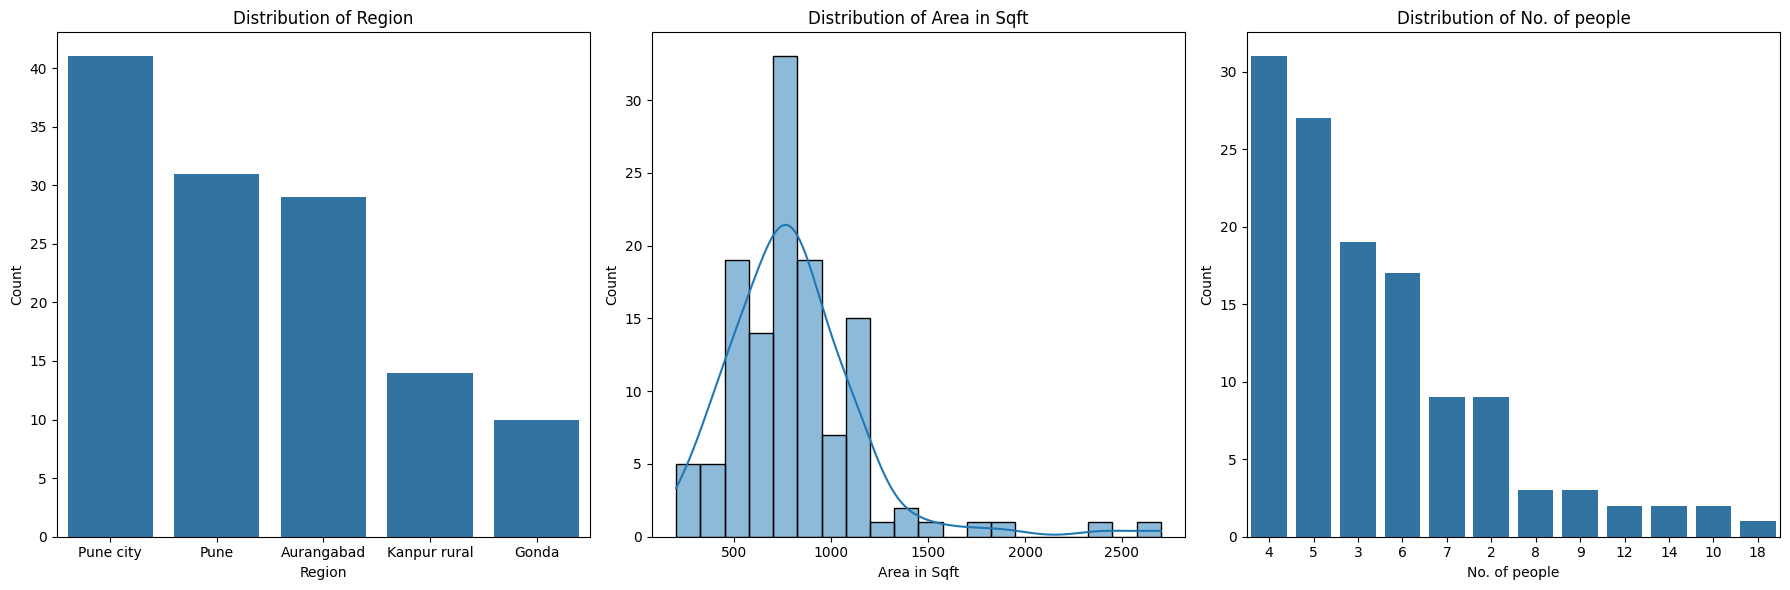

In [98]:
#plot distributions of  Region, Area and No. of people in df_house_filtered and plot them side by side
plt.figure(figsize=(18,6))  
plt.subplot(1, 3, 1)
sns.countplot(data=df_house_filtered, x='Region', order=df_house_filtered['Region'].value_counts().index)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
sns.histplot(data=df_house_filtered, x='Area in Sqft', bins=20, kde=True)
plt.title('Distribution of Area in Sqft')
plt.xlabel('Area in Sqft')
plt.ylabel('Count')
plt.subplot(1, 3, 3)
sns.countplot(data=df_house_filtered, x='No. of People', order=df_house_filtered['No. of People'].value_counts().index)
plt.title('Distribution of No. of people')
plt.xlabel('No. of people')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

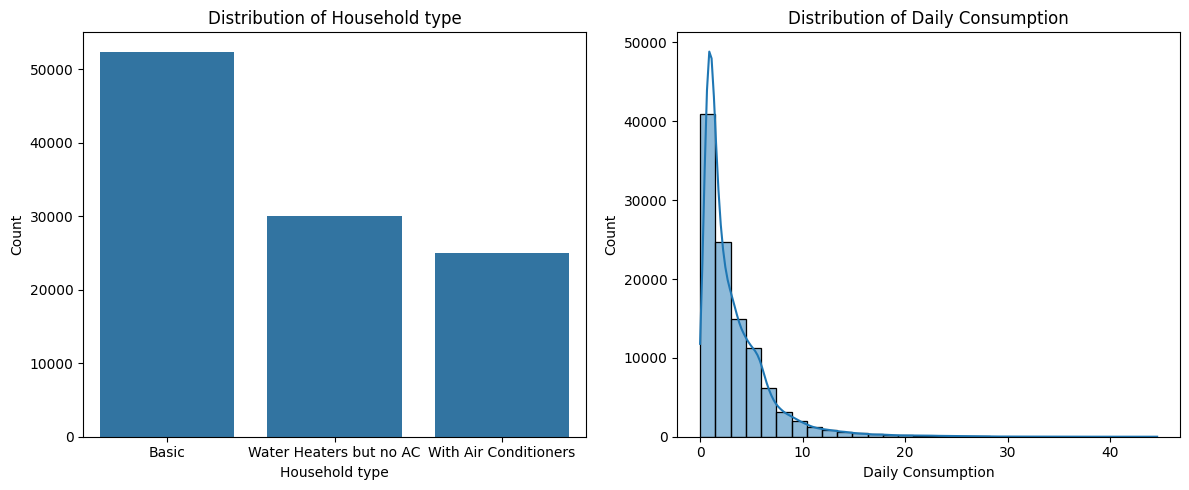

In [99]:
#plot distributions of  Household type in df_daily_filtered : Household type, and continuous distribution of the daily consumption in plots side by side
plt.figure(figsize=(12,5))  
plt.subplot(1, 2, 1)    
sns.countplot(data=df_daily_filtered, x='Household type', order=df_daily_filtered['Household type'].value_counts().index)
plt.title('Distribution of Household type')
plt.xlabel('Household type')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.histplot(data=df_daily_filtered, x='Daily consumption (kWh)', bins=30, kde=True)
plt.title('Distribution of Daily Consumption')
plt.xlabel('Daily Consumption')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

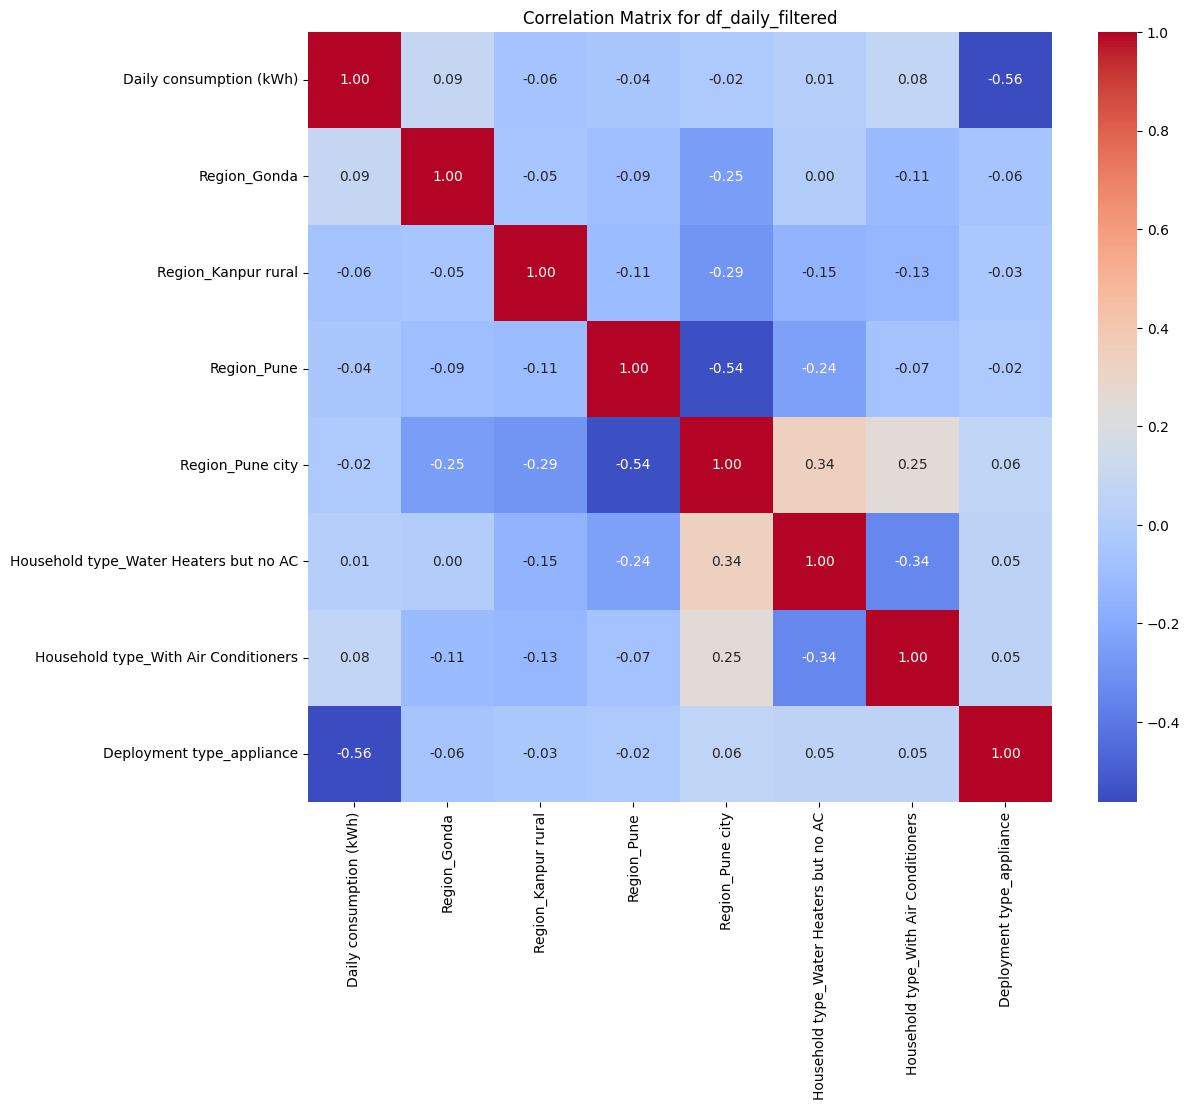

In [100]:
#check correlation between all the numerical featues or use one-hot encoding for categorical features for df_daily_filtered, remove the date column while doing this anaylisys
df_daily_filtered_encoded = pd.get_dummies(df_daily_filtered.drop(columns=['Date','household_id','deployment_id']), drop_first=True)
correlation_matrix = df_daily_filtered_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for df_daily_filtered')
plt.show()


lol no heavy correlation rly


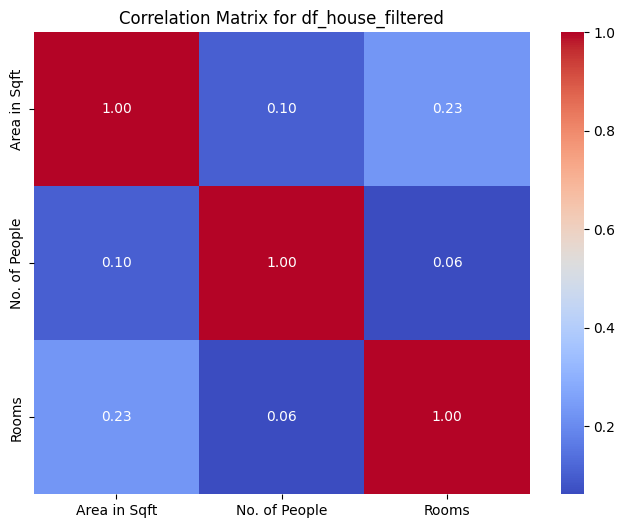

In [101]:
#check correlation between Area in Sqft, No. of People, and No. of Rooms in df_house_filtered
plt.figure(figsize=(8, 6))
correlation_matrix = df_house_filtered[['Area in Sqft', 'No. of People', 'Rooms']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for df_house_filtered')
plt.show()
                                        

ntg again lollllllllllllllllllllllllllllllllllllllllllllll

# Feature Engineering

In [102]:
#make a new dataframe which has alll the columns from both using the house ID, note that one df has repeatig house IDs as it is daily data
df_merged = pd.merge(df_daily_filtered, df_house_filtered, left_on='household_id', right_on='HHID', how='inner')
df_merged.head()                     

,Region_x,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh),HHID,Region_y,Rooms,...,Ceiling Fans,Air Coolers,Air-Conditioners,Fridge,TV,Water heaters,Washing Machine,Mixer,Iron,Micro-wave
0,Pune city,With Air Conditioners,H002,appliance,D0003,12/22/2019,1.039917,H002,Pune city,5.0,...,5,0,3.0,1,1,1,1,1,1,1
1,Pune city,With Air Conditioners,H002,appliance,D0003,12/23/2019,0.930054,H002,Pune city,5.0,...,5,0,3.0,1,1,1,1,1,1,1
2,Pune city,With Air Conditioners,H002,appliance,D0003,12/24/2019,1.059936,H002,Pune city,5.0,...,5,0,3.0,1,1,1,1,1,1,1
3,Pune city,With Air Conditioners,H002,appliance,D0003,12/25/2019,1.270020,H002,Pune city,5.0,...,5,0,3.0,1,1,1,1,1,1,1
4,Pune city,With Air Conditioners,H002,appliance,D0003,12/26/2019,1.010010,H002,Pune city,5.0,...,5,0,3.0,1,1,1,1,1,1,1


In [103]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109480 entries, 0 to 109479
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Region_x                 109480 non-null  object 
 1   Household type           109480 non-null  object 
 2   household_id             109480 non-null  object 
 3   Deployment type          109480 non-null  object 
 4   deployment_id            109480 non-null  object 
 5   Date                     109480 non-null  object 
 6   Daily consumption (kWh)  109480 non-null  float64
 7   HHID                     109480 non-null  object 
 8   Region_y                 109480 non-null  object 
 9   Rooms                    109480 non-null  float64
 10  No. of People            109480 non-null  int64  
 11  Area in Sqft             109480 non-null  float64
 12  Inverter                 109480 non-null  float64
 13  Lights                   109480 non-null  int64  
 14  Ceil

In [104]:
#make new columns called EUI, area per occupant and per-capita EUI
# EUI = (Total Energy Consumption in kWh) / (Area in Sqft)
# Per-Capita EUI = EUI / (No. of People)
df_merged['EUI'] = df_merged['Daily consumption (kWh)'] / df_merged['Area in Sqft']
df_merged['Per-Capita EUI'] = df_merged['EUI'] / df_merged['No. of People']
df_merged['Area per Occupant'] = df_merged['Area in Sqft'] / df_merged['No. of People']
df_merged.head()

,Region_x,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh),HHID,Region_y,Rooms,...,Fridge,TV,Water heaters,Washing Machine,Mixer,Iron,Micro-wave,EUI,Per-Capita EUI,Area per Occupant
0,Pune city,With Air Conditioners,H002,appliance,D0003,12/22/2019,1.039917,H002,Pune city,5.0,...,1,1,1,1,1,1,1,0.000945,0.000236,275.0
1,Pune city,With Air Conditioners,H002,appliance,D0003,12/23/2019,0.930054,H002,Pune city,5.0,...,1,1,1,1,1,1,1,0.000846,0.000211,275.0
2,Pune city,With Air Conditioners,H002,appliance,D0003,12/24/2019,1.059936,H002,Pune city,5.0,...,1,1,1,1,1,1,1,0.000964,0.000241,275.0
3,Pune city,With Air Conditioners,H002,appliance,D0003,12/25/2019,1.270020,H002,Pune city,5.0,...,1,1,1,1,1,1,1,0.001155,0.000289,275.0
4,Pune city,With Air Conditioners,H002,appliance,D0003,12/26/2019,1.010010,H002,Pune city,5.0,...,1,1,1,1,1,1,1,0.000918,0.000230,275.0


In [105]:
# we need to calculate Consumption Volatility (standard deviation of daily use), Seasonal Ratio (Summer vs. Winter), and Weekend-Weekday Ratio.
#Consumption Volatility (standard deviation of daily use), Seasonal Ratio (Summer vs. Winter), and Weekend-Weekday Ratio.
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged['Day of Week'] = df_merged['Date'].dt.dayofweek
df_merged['Month'] = df_merged['Date'].dt.month
def calculate_metrics(group):
    consumption_volatility = group['Daily consumption (kWh)'].std()
    summer_consumption = group[group['Month'].isin([6, 7, 8])]['Daily consumption (kWh)'].mean()
    winter_consumption = group[group['Month'].isin([12, 1, 2])]['Daily consumption (kWh)'].mean()
    seasonal_ratio = summer_consumption / winter_consumption if winter_consumption != 0 else np.nan
    weekend_consumption = group[group['Day of Week'].isin([5, 6])]['Daily consumption (kWh)'].mean()
    weekday_consumption = group[~group['Day of Week'].isin([5, 6])]['Daily consumption (kWh)'].mean()
    weekend_weekday_ratio = weekend_consumption / weekday_consumption if weekday_consumption != 0 else np.nan
    return pd.Series({
        'Consumption Volatility': consumption_volatility,
        'Seasonal Ratio': seasonal_ratio,
        'Weekend-Weekday Ratio': weekend_weekday_ratio
    })
metrics_df = df_merged.groupby('household_id').apply(calculate_metrics).reset_index()
metrics_df.head()

C:\Users\pjnay\AppData\Local\Temp\ipykernel_21780\1561561315.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics_df = df_merged.groupby('household_id').apply(calculate_metrics).reset_index()


,household_id,Consumption Volatility,Seasonal Ratio,Weekend-Weekday Ratio
0,H001,1.063080,1.462538,1.052487
1,H002,6.680022,1.220435,1.017973
2,H003,1.331445,1.296816,1.068126
3,H004,5.036270,0.909991,0.939793
4,H005,2.623689,1.334958,1.026518


In [106]:
problematic_households = metrics_df[metrics_df.isnull().any(axis=1)]
print(problematic_households)

   household_id  Consumption Volatility  Seasonal Ratio  Weekend-Weekday Ratio
43         H050                0.289108             NaN                0.99236
89         H105                     NaN             NaN                    NaN


we drop these two too :(

In [107]:
#drop these rows from metrics_df
metrics_df = metrics_df.dropna()
df_merged = pd.merge(df_merged, metrics_df, on='household_id', how='inner')
df_merged.head()

,Region_x,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh),HHID,Region_y,Rooms,...,Iron,Micro-wave,EUI,Per-Capita EUI,Area per Occupant,Day of Week,Month,Consumption Volatility,Seasonal Ratio,Weekend-Weekday Ratio
0,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-22,1.039917,H002,Pune city,5.0,...,1,1,0.000945,0.000236,275.0,6,12,6.680022,1.220435,1.017973
1,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-23,0.930054,H002,Pune city,5.0,...,1,1,0.000846,0.000211,275.0,0,12,6.680022,1.220435,1.017973
2,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-24,1.059936,H002,Pune city,5.0,...,1,1,0.000964,0.000241,275.0,1,12,6.680022,1.220435,1.017973
3,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-25,1.270020,H002,Pune city,5.0,...,1,1,0.001155,0.000289,275.0,2,12,6.680022,1.220435,1.017973
4,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-26,1.010010,H002,Pune city,5.0,...,1,1,0.000918,0.000230,275.0,3,12,6.680022,1.220435,1.017973


In [108]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109241 entries, 0 to 109240
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Region_x                 109241 non-null  object        
 1   Household type           109241 non-null  object        
 2   household_id             109241 non-null  object        
 3   Deployment type          109241 non-null  object        
 4   deployment_id            109241 non-null  object        
 5   Date                     109241 non-null  datetime64[ns]
 6   Daily consumption (kWh)  109241 non-null  float64       
 7   HHID                     109241 non-null  object        
 8   Region_y                 109241 non-null  object        
 9   Rooms                    109241 non-null  float64       
 10  No. of People            109241 non-null  int64         
 11  Area in Sqft             109241 non-null  float64       
 12  Inverter        

# Clustering

For n_clusters = 2, the average silhouette_score is : 0.1802551568830108
For n_clusters = 3, the average silhouette_score is : 0.191579420905844
For n_clusters = 4, the average silhouette_score is : 0.19946470736143185
For n_clusters = 5, the average silhouette_score is : 0.2172615750644347
For n_clusters = 6, the average silhouette_score is : 0.17492074092702067
For n_clusters = 7, the average silhouette_score is : 0.18906494956975844
For n_clusters = 8, the average silhouette_score is : 0.19338413491769788
For n_clusters = 9, the average silhouette_score is : 0.1992475213770807
For n_clusters = 10, the average silhouette_score is : 0.20090264152841425


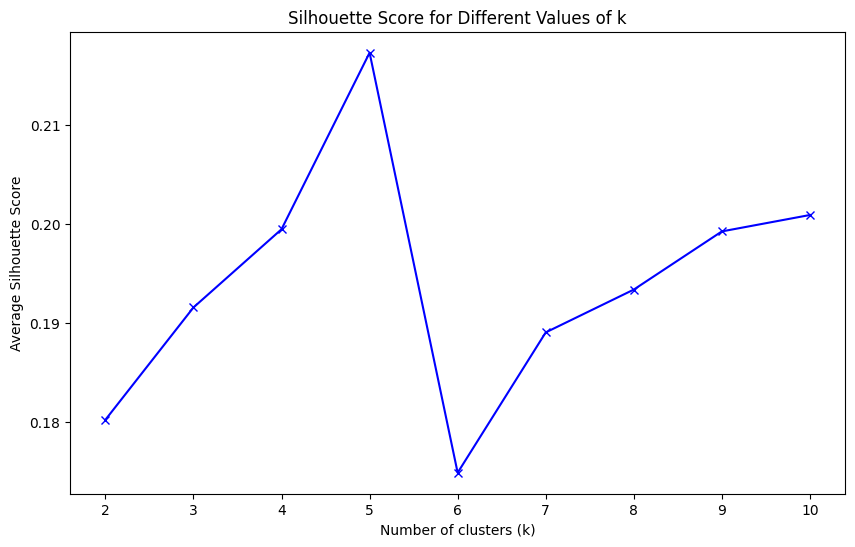

In [109]:
# perform k-means clustering on the features Per-Capita EUI, Area per Occupant, Consumption Volatility, Seasonal Ratio, and Weekend-Weekday Ratio (make sure you dont repeat using the same house ID again, so use drop duplicates on the house ID column first)
#first check the ideal number of clusters using the silhoutte score, print it too
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score                        
from sklearn.preprocessing import StandardScaler
features = ['Per-Capita EUI', 'Area per Occupant', 'Consumption Volatility', 'Seasonal Ratio', 'Weekend-Weekday Ratio']
df_unique = df_merged.drop_duplicates(subset=['household_id'])
X = df_unique[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

So we use number of clusters = 5


Primary Choice: GMM (Gaussian Mixture Models)

Why? The low K-Means scores suggest that clusters are not perfectly round and are likely overlapping. GMM is the perfect upgrade because it can model elliptical (stretched/rotated) clusters. It also provides "soft clustering," meaning it calculates the probability of each household belonging to each persona, which is a much richer and more realistic output.


Secondary Choice: DBSCAN

Why? Use this for a completely different perspective. Instead of forcing every household into a cluster, DBSCAN identifies dense regions of similar households. Its greatest strength is identifying outliers—those truly unique households that don't fit any persona. This could be invaluable for finding extreme energy users or anomalies.

For n_components = 2, BIC: 1456.9758803146196, AIC: 1342.6887188605558
For n_components = 3, BIC: 1420.7330942943402, AIC: 1247.9086062418532
For n_components = 4, BIC: 1465.3655223509575, AIC: 1234.0037077000477
For n_components = 5, BIC: 1478.3069420812678, AIC: 1188.407800831935
For n_components = 6, BIC: 1537.3235923072311, AIC: 1188.8871244594757
For n_components = 7, BIC: 1590.93131218579, AIC: 1183.9575177396111
For n_components = 8, BIC: 1603.959910500566, AIC: 1138.4487894559643
For n_components = 9, BIC: 1628.5234596164773, AIC: 1104.4750119734526
For n_components = 10, BIC: 1617.250464327507, AIC: 1034.6646900860594


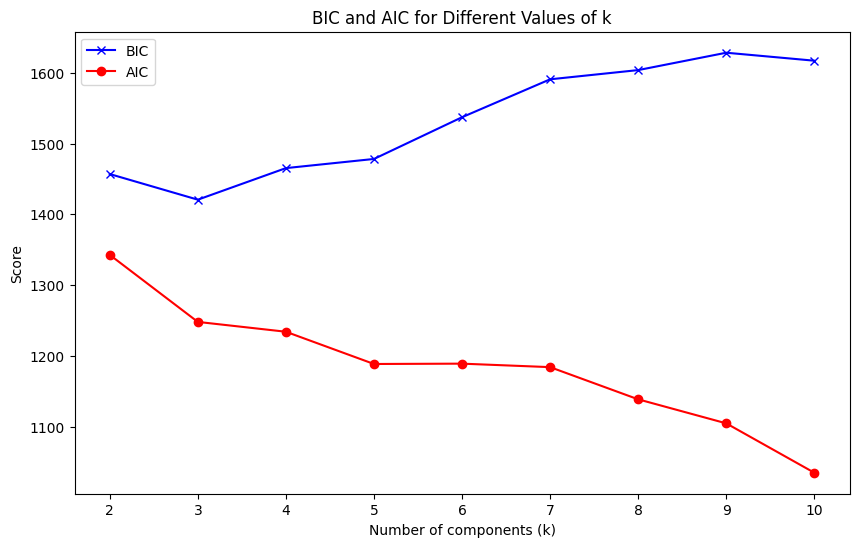

In [110]:
 #information criteria like the Bayesian Information Criterion (BIC) and the Akaike Information Criterion (AIC).
# Use Gaussian Mixture Models for this
from sklearn.mixture import GaussianMixture
bic_scores = []
aic_scores = []
K = range(2, 11)
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))
    print(f"For n_components = {k}, BIC: {bic_scores[-1]}, AIC: {aic_scores[-1]}")
plt.figure(figsize=(10, 6))
plt.plot(K, bic_scores, 'bx-', label='BIC')
plt.plot(K, aic_scores, 'ro-', label='AIC')
plt.xlabel('Number of components (k)')
plt.ylabel('Score')
plt.title('BIC and AIC for Different Values of k')
plt.legend()
plt.show()

In [111]:
#perform GMM usign n_compnents=3
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)
df_unique['Cluster'] = labels
df_unique.head()

C:\Users\pjnay\AppData\Local\Temp\ipykernel_21780\67681136.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Cluster'] = labels


,Region_x,Household type,household_id,Deployment type,deployment_id,Date,Daily consumption (kWh),HHID,Region_y,Rooms,...,Micro-wave,EUI,Per-Capita EUI,Area per Occupant,Day of Week,Month,Consumption Volatility,Seasonal Ratio,Weekend-Weekday Ratio,Cluster
0,Pune city,With Air Conditioners,H002,appliance,D0003,2019-12-22,1.039917,H002,Pune city,5.0,...,1,0.000945,0.000236,275.0,6,12,6.680022,1.220435,1.017973,2
190,Aurangabad,Basic,H114,Mainline,D0213,2019-07-06,3.300000,H114,Aurangabad,2.0,...,0,0.007333,0.001467,90.0,5,7,0.900308,1.061806,1.079234,0
424,Aurangabad,Basic,H118,Mainline,D0220,2020-02-12,19.900000,H118,Aurangabad,3.0,...,0,0.033167,0.004146,75.0,2,2,9.332850,0.936015,1.050023,2
563,Aurangabad,Basic,H119,Mainline,D0222,2019-06-13,0.600000,H119,Aurangabad,5.0,...,0,0.001333,0.000074,25.0,3,6,1.368097,2.680517,1.079085,1
658,Aurangabad,Basic,H122,Mainline,D0227,2019-12-22,6.600000,H122,Aurangabad,5.0,...,0,0.011000,0.001833,100.0,6,12,3.517208,1.275679,1.026159,0


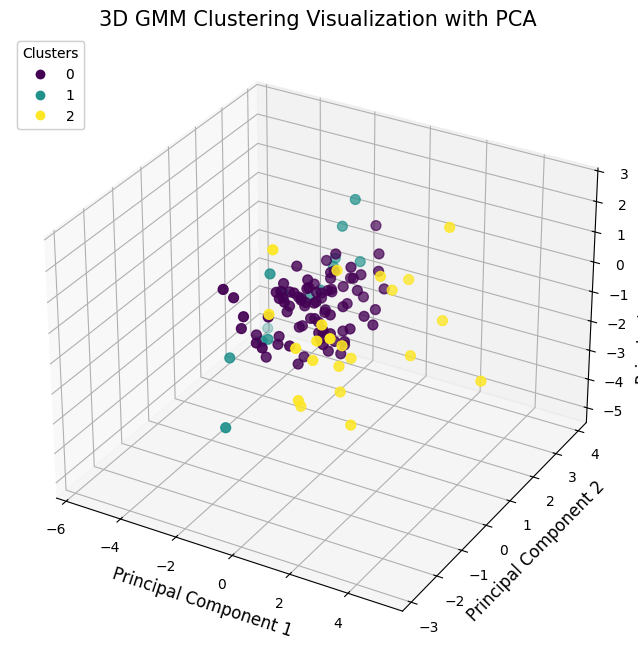

In [112]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2', 'PC3'])
df_pca['Cluster'] = labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], 
                     c=df_pca['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.set_title('3D GMM Clustering Visualization with PCA', fontsize=15)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Clusters")
ax.add_artist(legend1)
plt.show()

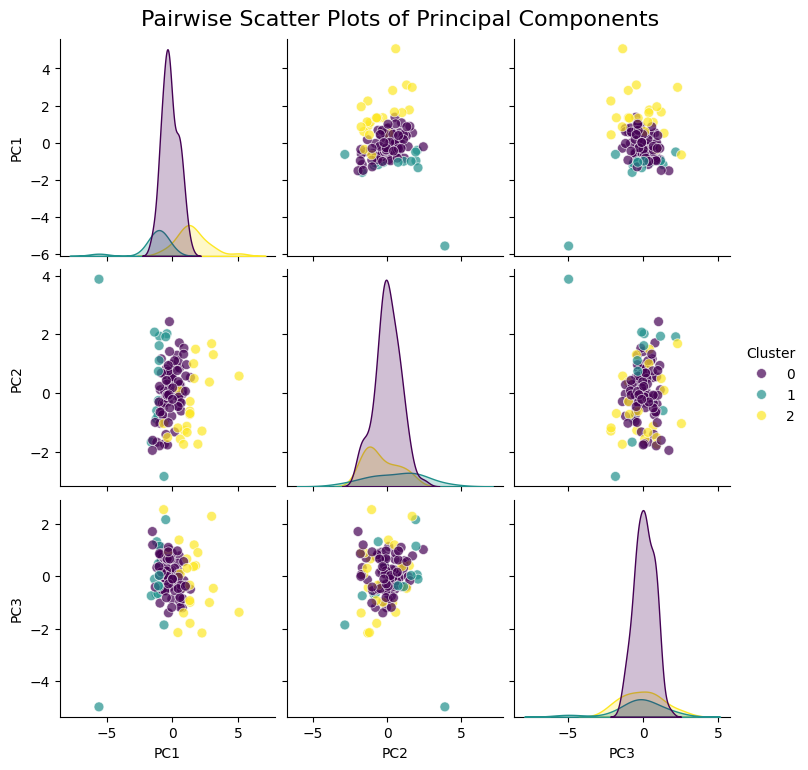

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_pca, hue='Cluster', vars=['PC1', 'PC2', 'PC3'], palette='viridis', plot_kws={'alpha': 0.7, 's': 50})
plt.suptitle('Pairwise Scatter Plots of Principal Components', y=1.02, fontsize=16)
plt.show()

# Analysis

In [114]:
df_unique.columns

Index(['Region_x', 'Household type', 'household_id', 'Deployment type',
       'deployment_id', 'Date', 'Daily consumption (kWh)', 'HHID', 'Region_y',
       'Rooms', 'No. of People', 'Area in Sqft', 'Inverter', 'Lights',
       'Ceiling Fans', 'Air Coolers', 'Air-Conditioners', 'Fridge', 'TV',
       'Water heaters', 'Washing Machine', 'Mixer', 'Iron', 'Micro-wave',
       'EUI', 'Per-Capita EUI', 'Area per Occupant', 'Day of Week', 'Month',
       'Consumption Volatility', 'Seasonal Ratio', 'Weekend-Weekday Ratio',
       'Cluster'],
      dtype='object')

In [115]:
import pandas as pd

# This assumes 'df_unique' is the dataframe with your household data, features,
# and the 'Cluster' column.

# --- 1. Quantitative Analysis: Calculate the mean of key features for each cluster ---
cluster_analysis = df_unique.groupby('Cluster').agg({
    'Daily consumption (kWh)': 'mean',
    'Area in Sqft': 'mean',
    'No. of People': 'mean',
    'EUI': 'mean',
    'Per-Capita EUI': 'mean',
    'Consumption Volatility': 'mean',
    'Seasonal Ratio': 'mean',
    'Weekend-Weekday Ratio': 'mean',
    'Area per Occupant': 'mean'
}).reset_index()

print("Cluster Profile Analysis (Mean Values):")
display(cluster_analysis.round(2))
print("\n" + "="*80 + "\n")


# --- 2. Composition Analysis: Frequency of Household Types in each Cluster ---
print("Household Type Composition within Each Cluster:")

# Using crosstab to get a clear frequency table
composition_analysis = pd.crosstab(df_unique['Cluster'], df_unique['Household type'])
display(composition_analysis)

# Optional: Display as percentages for easier comparison
composition_percentage = pd.crosstab(df_unique['Cluster'], df_unique['Household type'], normalize='index').multiply(100).round(1)
composition_percentage.rename(columns=lambda x: x + " (%)", inplace=True)
print("\nHousehold Type Composition within Each Cluster (%):")
display(composition_percentage)

Cluster Profile Analysis (Mean Values):


,Cluster,Daily consumption (kWh),Area in Sqft,No. of People,EUI,Per-Capita EUI,Consumption Volatility,Seasonal Ratio,Weekend-Weekday Ratio,Area per Occupant
0,0,2.34,773.10,4.94,0.00,0.0,1.79,1.44,1.02,177.89
1,1,0.59,878.57,6.86,0.00,0.0,1.08,5.63,1.02,178.32
2,2,5.20,891.45,4.64,0.01,0.0,4.81,1.19,1.03,229.03




Household Type Composition within Each Cluster:


Household type,Basic,Water Heaters but no AC,With Air Conditioners
Cluster,,,
0,56,15,13
1,12,2,0
2,6,8,8



Household Type Composition within Each Cluster (%):


Household type,Basic (%),Water Heaters but no AC (%),With Air Conditioners (%)
Cluster,,,
0,66.7,17.9,15.5
1,85.7,14.3,0.0
2,27.3,36.4,36.4


Persona Definitions
Based on your analysis, here are the data-driven personas:

**Cluster 1**: The "Minimalist Users" 
This is the most frugal group and also the smallest cluster.


1. Behavior: They have extremely low daily consumption (0.59 kWh) and very little variation in their daily use (low volatility). The most peculiar feature is their extremely high seasonal ratio (5.63), which means that while their overall usage is tiny, it's highly concentrated in one season, suggesting very specific, intermittent needs.

2. Composition: This group is predominantly made up of 'Basic' households (85.7%) and has zero homes with air conditioners. This aligns perfectly with their low energy footprint.

**Cluster 0**: The "Steady Spenders" 
This is the largest and most typical group, representing the baseline household.

1. Behavior: They have a moderate daily consumption (2.34 kWh) and moderate volatility. Their seasonal and weekend/weekday ratios are close to 1, indicating a consistent and predictable pattern of energy use throughout the year.

2. Composition: This cluster is primarily composed of 'Basic' households (66.7%), but includes a mix of homes with water heaters and AC units. They are the "average" household in the dataset.

**Cluster 2**: The "High Baseline Consumers" 
This group are the power users, but in a very interesting way.

1. Behavior: They have the highest daily consumption by far (5.20 kWh) and the most erratic usage (highest volatility). Counterintuitively, they have the lowest seasonal ratio (1.19), meaning their high energy use is consistent throughout the year, not just a summer peak. This points towards appliance-driven consumption that isn't weather-dependent (like water heaters, inefficient refrigerators, or electronics). They also live in the largest homes with the most space per person.

2. Composition: This is the most appliance-heavy group, with the highest percentage of homes with Water Heaters (36.4%) and Air Conditioners (36.4%).


Plotting average daily consumption for each persona...


C:\Users\pjnay\AppData\Local\Temp\ipykernel_21780\2277333344.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_merged_clustered, x='Date', y='Daily consumption (kWh)', hue='Persona', palette='viridis', ci=None)


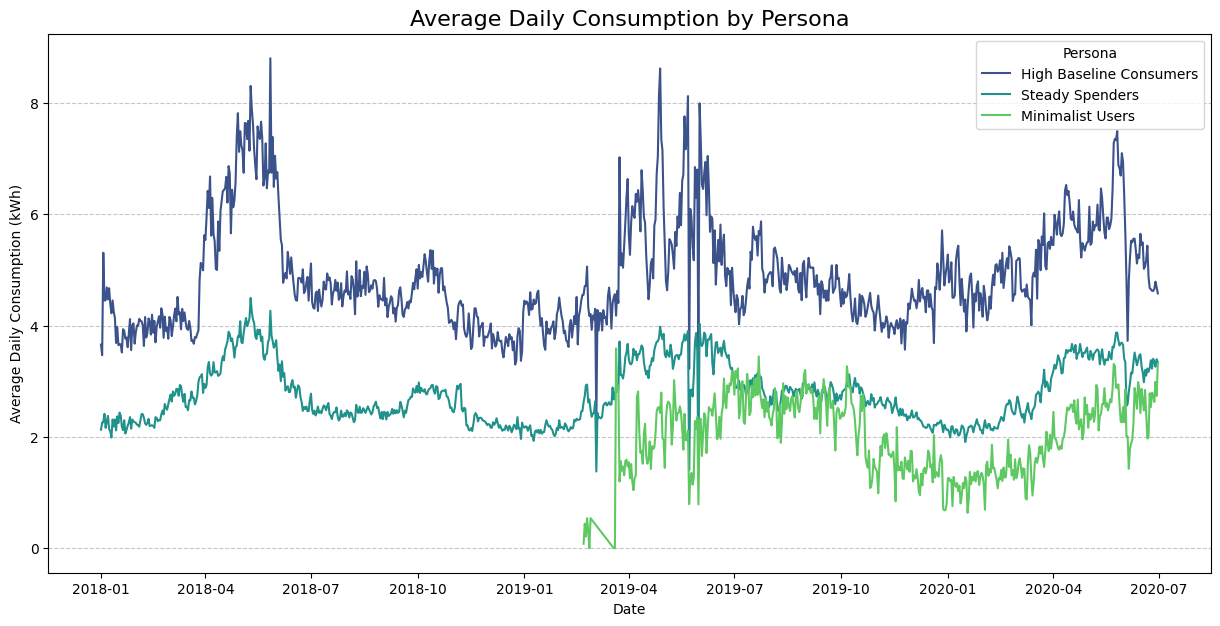


Plotting average weekly consumption patterns for each persona...


C:\Users\pjnay\AppData\Local\Temp\ipykernel_21780\2277333344.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=weekly_consumption, x='Day of Week', y='Daily consumption (kWh)', hue='Persona', marker='o', palette='viridis', ci=None)


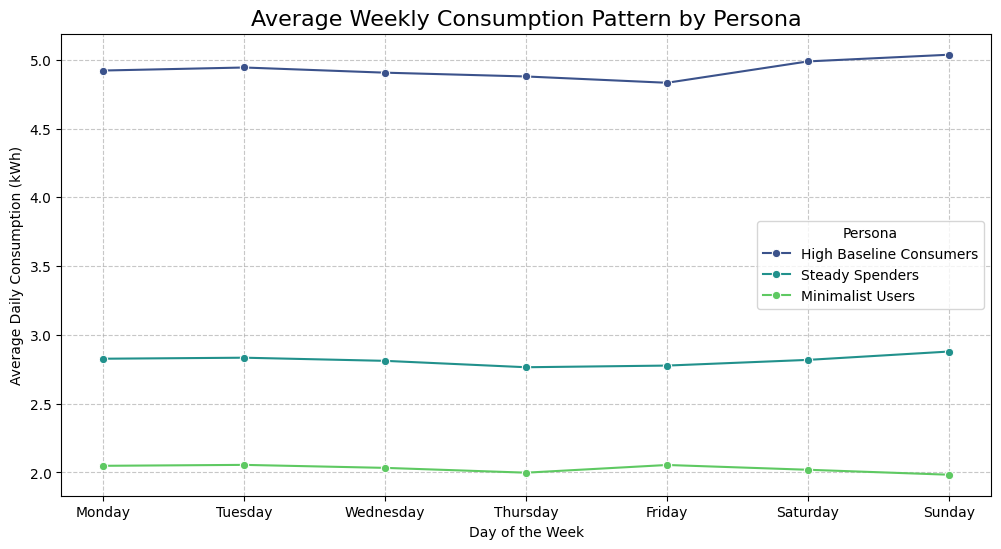

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df_merged_clustered = pd.merge(df_merged, df_unique[['household_id', 'Cluster']], on='household_id', how='left')
df_merged_clustered.dropna(subset=['Cluster'], inplace=True)

cluster_map = {
    0: "Steady Spenders",
    1: "Minimalist Users",
    2: "High Baseline Consumers"
}
df_merged_clustered['Persona'] = df_merged_clustered['Cluster'].map(cluster_map)
print("\nPlotting average daily consumption for each persona...")
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_merged_clustered, x='Date', y='Daily consumption (kWh)', hue='Persona', palette='viridis', ci=None)
plt.title('Average Daily Consumption by Persona', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Average Daily Consumption (kWh)')
plt.legend(title='Persona')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("\nPlotting average weekly consumption patterns for each persona...")
df_merged_clustered['Day of Week'] = df_merged_clustered['Date'].dt.day_name()
weekly_consumption = df_merged_clustered.groupby(['Persona', 'Day of Week'])['Daily consumption (kWh)'].mean().reset_index()
weekly_consumption['Day of Week'] = pd.Categorical(weekly_consumption['Day of Week'],
                                                    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                    ordered=True)
weekly_consumption = weekly_consumption.sort_values('Day of Week')

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_consumption, x='Day of Week', y='Daily consumption (kWh)', hue='Persona', marker='o', palette='viridis', ci=None)
plt.title('Average Weekly Consumption Pattern by Persona', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Consumption (kWh)')
plt.legend(title='Persona')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Checking significance of difference between the household types using t-test

In [ ]:
from scipy.stats import ttest_ind

avg_consumption_by_type = df_merged.groupby('Household type')['Daily consumption (kWh)'].mean()
print("Average daily consumption by household type:")
print(avg_consumption_by_type)

ac_consumption = df_merged[df_merged['Household type'] == 'With Air Conditioners']['Daily consumption (kWh)']
basic_consumption = df_merged[df_merged['Household type'] == 'Basic']['Daily consumption (kWh)']

ttest_result = ttest_ind(ac_consumption, basic_consumption)
print(f"\nT-test result: {ttest_result}")

df_merged['Month'] = df_merged['Date'].dt.month
summer_months = [3, 4, 5]
winter_months = [12, 1, 2]

summer_consumption = df_merged[df_merged['Month'].isin(summer_months)]
winter_consumption = df_merged[df_merged['Month'].isin(winter_months)]

ac_summer_avg = summer_consumption[summer_consumption['Household type'] == 'With Air Conditioners']['Daily consumption (kWh)'].mean()
ac_winter_avg = winter_consumption[winter_consumption['Household type'] == 'With Air Conditioners']['Daily consumption (kWh)'].mean()

estimated_ac_consumption = ac_summer_avg - ac_winter_avg
print(f"\nEstimated average daily AC consumption: {estimated_ac_consumption:.2f} kWh")

Average daily consumption by household type:
Household type
Basic                      3.008055
Water Heaters but no AC    3.330064
With Air Conditioners      3.739990
Name: Daily consumption (kWh), dtype: float64

T-test result: TtestResult(statistic=np.float64(27.85829026394286), pvalue=np.float64(5.681481027452764e-170), df=np.float64(79185.0))

Estimated average daily AC consumption: 1.99 kWh


The output from this step gives us some very clear insights:

Clear Consumption Hierarchy: As expected, households 'With Air Conditioners' are the highest energy consumers, followed by those with 'Water Heaters but no AC', and finally the 'Basic' households. This confirms a direct link between major appliances and energy use.

Statistically Significant Difference: The very small p-value (essentially zero) from the t-test confirms that the higher consumption in households with AC is not a random fluke; it's a statistically significant difference.

AC Impact Quantified: Analysis estimates that running an air conditioner adds approximately 1.99 kWh to the average daily consumption during summer months. This is a powerful, actionable insight.

### Drawing a dendogram using DWT

Analyzing a sample of 30 households from the 'Steady Spenders' cluster.
Calculating DTW distance matrix... (This may take a few minutes)
Calculation complete.


C:\Users\pjnay\AppData\Local\Temp\ipykernel_21780\3578795404.py:41: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='ward')


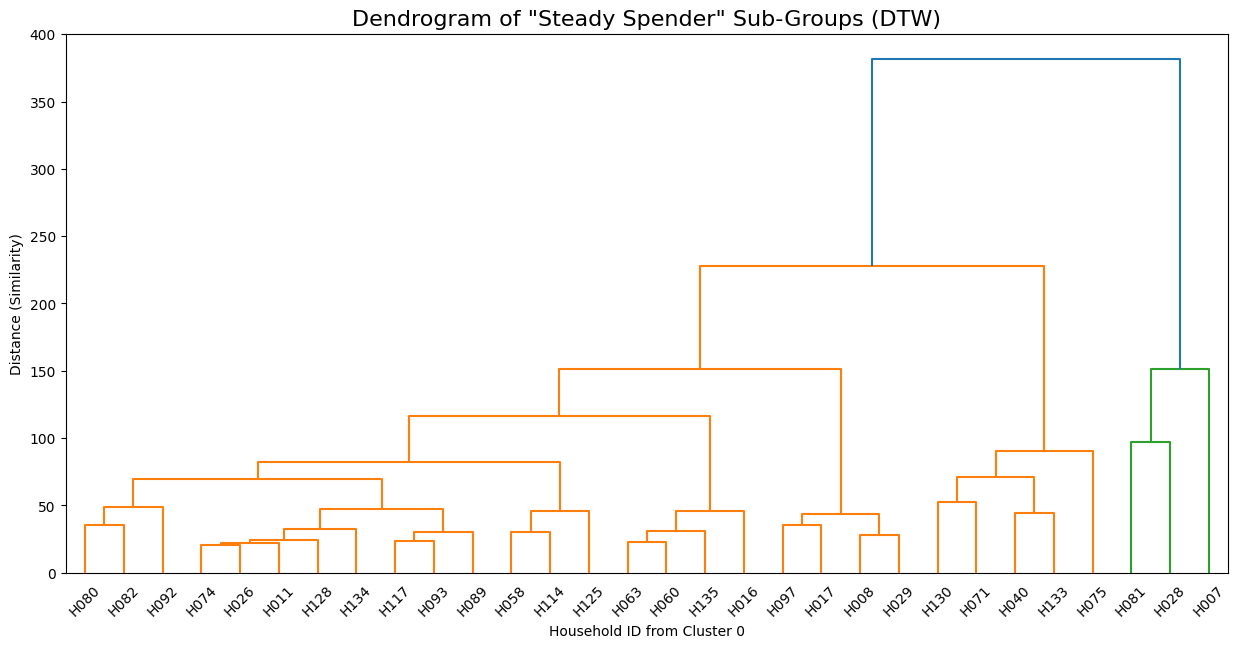

In [133]:
# --- Step 1: Install the required library ---
# !pip install dtaidistance

import numpy as np
import pandas as pd
from dtaidistance import dtw
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

# --- Step 2: Prepare the data (Revised) ---
# Isolate the household IDs from Cluster 0, our largest group
steady_spender_ids = df_unique[df_unique['Cluster'] == 0]['household_id']

# To keep computation fast, we'll take a sample from within this cluster.
# If the cluster has 30 or fewer members, we'll use all of them.
SAMPLE_SIZE = 30
if len(steady_spender_ids) > SAMPLE_SIZE:
    sample_household_ids = steady_spender_ids.sample(n=SAMPLE_SIZE, random_state=42)
else:
    sample_household_ids = steady_spender_ids

print(f"Analyzing a sample of {len(sample_household_ids)} households from the 'Steady Spenders' cluster.")

df_sample = df_merged[df_merged['household_id'].isin(sample_household_ids)]

# Use pivot_table to handle any duplicate date entries for a household
pivot_df = df_sample.pivot_table(index='Date', columns='household_id', values='Daily consumption (kWh)', aggfunc='mean')

# Fill any missing values with 0
pivot_df.fillna(0, inplace=True)

# Transpose the data so each row represents one household's time series
time_series_data = pivot_df.transpose().values

# --- Step 3: Calculate the DTW distance matrix ---
print("Calculating DTW distance matrix... (This may take a few minutes)")
distance_matrix = dtw.distance_matrix_fast(time_series_data)
print("Calculation complete.")

# --- Step 4: Perform Hierarchical Clustering ---
linked = linkage(distance_matrix, method='ward')

# --- Step 5: Visualize the results with a Dendrogram ---
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            labels=sample_household_ids.tolist(),
            distance_sort='descending',
            show_leaf_counts=True)
plt.title(f'Dendrogram of "Steady Spender" Sub-Groups (DTW)', fontsize=16)
plt.xlabel('Household ID from Cluster 0')
plt.ylabel('Distance (Similarity)')
plt.show()

# --- Step 6: Assign clusters and visualize the time series shapes ---


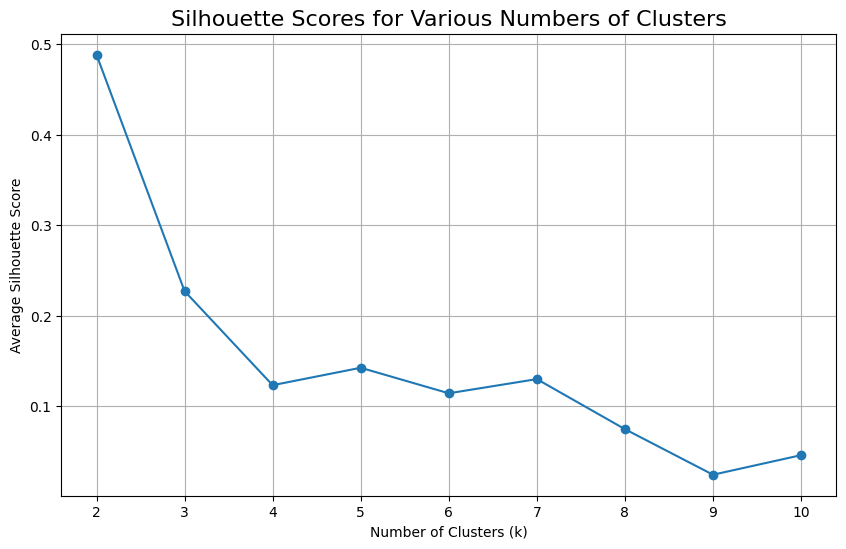

In [138]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# We will test a range of cluster numbers, e.g., from 2 to 10
cluster_range = range(2, 11)
silhouette_scores = []

# Remember that silhouette_score needs the original distance matrix
# and the cluster labels for each data point
for n_clusters in cluster_range:
    # Get cluster labels for each data point
    labels = fcluster(linked, n_clusters, criterion='maxclust')
    
    # Calculate the silhouette score. Note: it requires the condensed distance matrix
    # The linkage function outputs a different format, so we use our original 'distance_matrix'
    # and convert it to a condensed format for the function.
    # However, since linkage can take a condensed matrix, let's assume `distance_matrix`
    # is the non-condensed square matrix from `dtw.distance_matrix_fast`.
    score = silhouette_score(distance_matrix, labels, metric='precomputed')
    silhouette_scores.append(score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

Analyzing a sample of 30 households from the 'Steady Spenders' cluster.
Calculating DTW distance matrix...
Calculation complete.

Plotting smoothed average consumption shapes for 2 sub-groups...


C:\Users\pjnay\AppData\Local\Temp\ipykernel_21780\1602045273.py:24: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(distance_matrix, method='ward')


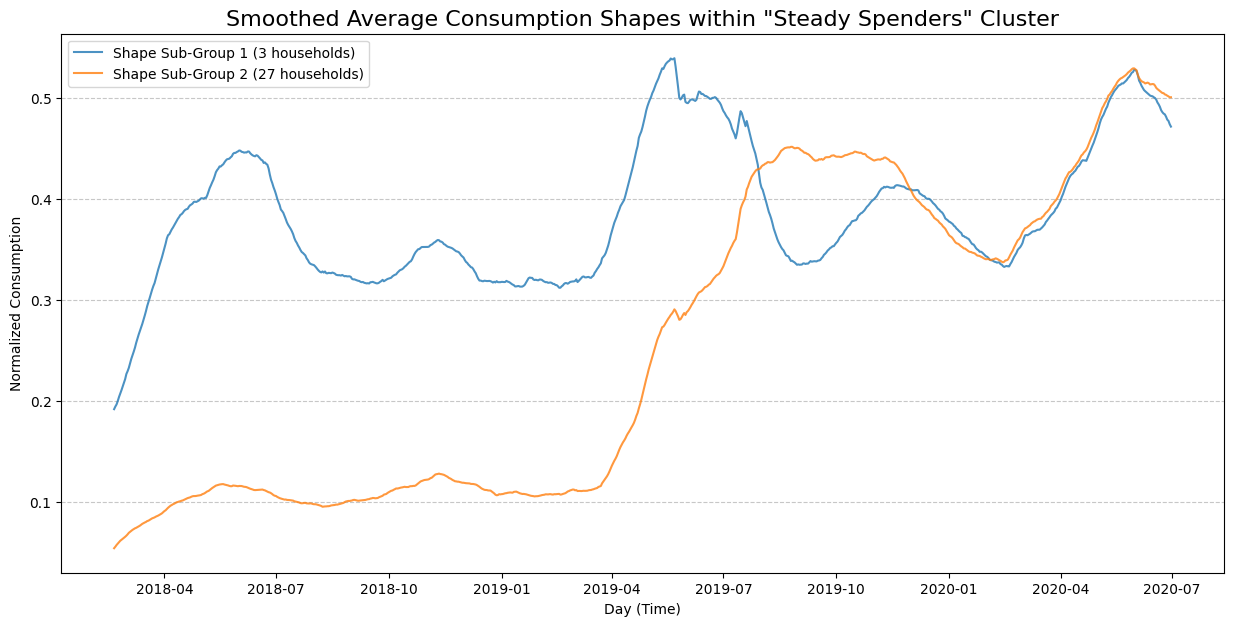

In [148]:
import numpy as np
import pandas as pd
from dtaidistance import dtw
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

steady_spender_ids = df_unique[df_unique['Cluster'] == 0]['household_id']

SAMPLE_SIZE = 30
if len(steady_spender_ids) > SAMPLE_SIZE:
    sample_household_ids = steady_spender_ids.sample(n=SAMPLE_SIZE, random_state=42)
else:
    sample_household_ids = steady_spender_ids
print(f"Analyzing a sample of {len(sample_household_ids)} households from the 'Steady Spenders' cluster.")


df_sample = df_merged[df_merged['household_id'].isin(sample_household_ids)]
pivot_df = df_sample.pivot_table(index='Date', columns='household_id', values='Daily consumption (kWh)', aggfunc='mean')
pivot_df.fillna(0, inplace=True)
time_series_data = pivot_df.transpose().values

print("Calculating DTW distance matrix...")
distance_matrix = dtw.distance_matrix_fast(time_series_data)
linked = linkage(distance_matrix, method='ward')
print("Calculation complete.")


NUM_SHAPE_CLUSTERS = 2
dtw_clusters = fcluster(linked, NUM_SHAPE_CLUSTERS, criterion='maxclust')

df_dtw_clusters = pd.DataFrame({
    'household_id': sample_household_ids,
    'DTW_Cluster': dtw_clusters
})


df_to_plot = pivot_df.transpose().reset_index()

df_to_plot = df_to_plot.merge(df_dtw_clusters, on='household_id')


print(f"\nPlotting smoothed average consumption shapes for {NUM_SHAPE_CLUSTERS} sub-groups...")
plt.figure(figsize=(15, 7))
cluster_counts = df_dtw_clusters['DTW_Cluster'].value_counts()
for i in range(1, NUM_SHAPE_CLUSTERS + 1):
    cluster_series_df = df_to_plot[df_to_plot['DTW_Cluster'] == i].drop(columns=['household_id', 'DTW_Cluster'])
    
    # Normalize to compare pure shapes
    normalized_series = (cluster_series_df.T - cluster_series_df.T.min()) / (cluster_series_df.T.max() - cluster_series_df.T.min())
    
    # Calculate the average shape for the cluster
    average_shape = normalized_series.mean(axis=1)
    
    # Apply a 50-day moving average to smooth the line
    smoothed_shape = average_shape.rolling(window=50).mean()
    
    # *** EDIT: Create a dynamic label that includes the household count ***
    count = cluster_counts.get(i, 0) # .get(i, 0) safely gets the count for cluster i
    plot_label = f'Shape Sub-Group {i} ({count} households)'
    
    plt.plot(smoothed_shape, label=plot_label, alpha=0.8)

plt.title('Smoothed Average Consumption Shapes within "Steady Spenders" Cluster', fontsize=16)
plt.xlabel('Day (Time)')
plt.ylabel('Normalized Consumption')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Analysis of Consumption Rhythms within the "Steady Spenders" Persona



To gain deeper insights into the behaviors of the largest identified persona, the "Steady Spenders," a secondary, more detailed clustering analysis was performed. Using Dynamic Time Warping (DTW), we clustered a sample of 30 households from this group based on the shape and rhythm of their year-long energy consumption, rather than the total amount.

This analysis revealed a significant and insightful split, identifying two distinct sub-groups with highly different behavioral patterns.

Key Observations:
The clustering resulted in one dominant group and one small group of outliers:

1. Sub-Group 1: The "Seasonal Outliers" (3 Households): This small cohort exhibited a traditional, seasonal energy consumption pattern. Their usage was lower during the cooler months (starting from December 2019) and rose to a clear peak during the summer of 2020. This represents the expected, weather-driven energy behavior.

2. Sub-Group 2: The "Consistent Responders" (27 Households): This overwhelming majority displayed a markedly different pattern. Their energy consumption started at a relatively high level and remained consistently elevated and flat throughout the entire year of 2020, with no discernible seasonal peak.

Hypothesis: The COVID-19 Lockdown Effect
The timeline of the dataset, which covers the entirety of 2020, strongly suggests that the flat consumption profile of the majority group is a direct behavioral signature of the COVID-19 pandemic lockdowns.

The rationale is as follows:

Increased Baseload: With the widespread shift to working and learning from home starting in early 2020, the daily baseload energy consumption for these 27 households likely increased significantly. Constant use of computers, lighting, entertainment, and kitchen appliances created a new, high-energy "normal."

Masked Seasonality: This new, elevated baseload consumption was so substantial that it effectively masked the typical summer peak caused by air conditioning or fans. The additional energy for cooling became a much smaller fraction of the total daily use, resulting in the observed flat, consistent consumption curve.

Conclusion
The time-series clustering was highly effective, not only in segmenting households by their consumption rhythm but also in uncovering the profound impact of a major real-world event. The analysis successfully distinguishes the majority of households, whose energy patterns were reshaped by the pandemic lockdown, from a small group of outliers who maintained a more traditional, seasonal consumption pattern. This finding provides a powerful, data-driven insight into the tangible effects of large-scale societal shifts on household energy behavior.

In [149]:
from scipy.stats import ttest_ind
import pandas as pd

# --- 1. Isolate the data for the 27 households in the main group ---
main_group_ids = df_dtw_clusters[df_dtw_clusters['DTW_Cluster'] == 2]['household_id']
main_group_df = df_merged[df_merged['household_id'].isin(main_group_ids)].copy()

# Ensure the Date column is in datetime format
main_group_df['Date'] = pd.to_datetime(main_group_df['Date'])

# --- 2. Define the 'before' and 'after' periods using the end of Jan 2020 ---
pre_period_consumption = main_group_df[main_group_df['Date'] < '2020-02-01']['Daily consumption (kWh)']
post_period_consumption = main_group_df[main_group_df['Date'] >= '2020-02-01']['Daily consumption (kWh)']

# --- 3. Perform an Independent T-Test ---
ttest_result = ttest_ind(pre_period_consumption, post_period_consumption, nan_policy='omit')

# --- 4. Interpret the Results ---
print(f"Average consumption BEFORE Feb 2020: {pre_period_consumption.mean():.2f} kWh")
print(f"Average consumption FROM Feb 2020 onwards: {post_period_consumption.mean():.2f} kWh")
print("-" * 50)
print(f"T-test statistic: {ttest_result.statistic:.2f}")
print(f"P-value: {ttest_result.pvalue}")

if ttest_result.pvalue < 0.05:
    print("\nConclusion: The result is statistically significant. There was a real shift in baseline consumption after January 2020.")
else:
    print("\nConclusion: The result is not statistically significant. We cannot confirm a real shift in consumption after January 2020.")

Average consumption BEFORE Feb 2020: 2.65 kWh
Average consumption FROM Feb 2020 onwards: 3.03 kWh
--------------------------------------------------
T-test statistic: -11.73
P-value: 1.0385704838109573e-31

Conclusion: The result is statistically significant. There was a real shift in baseline consumption after January 2020.


Statistically proven that the change in behavior is real and not just random chance.

Distribution of Households by Consumption Trend:


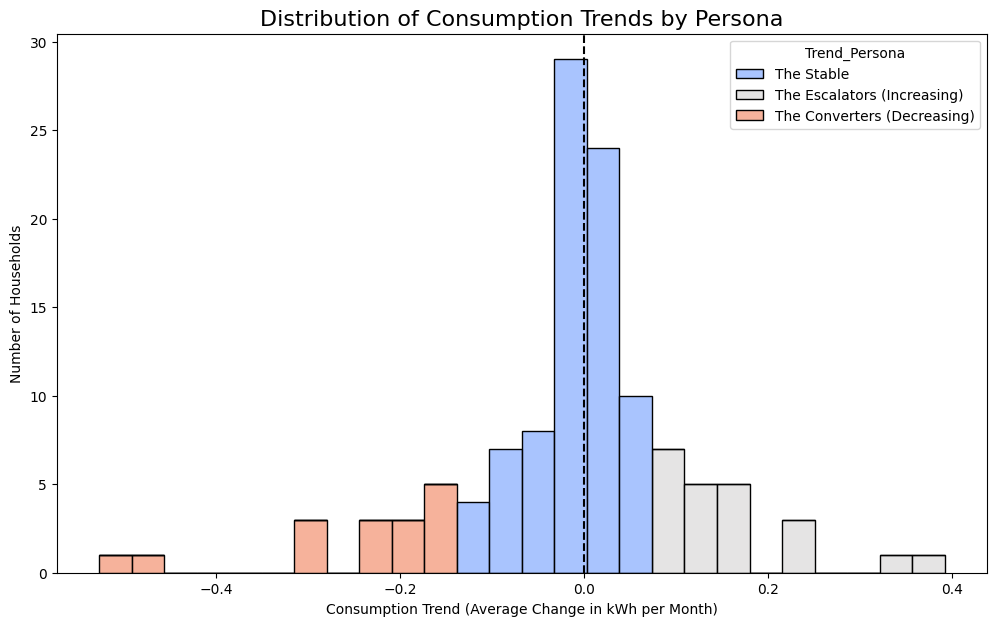


Number of households in each trend-based persona:
Trend_Persona
The Stable                     82
The Escalators (Increasing)    22
The Converters (Decreasing)    16
Name: count, dtype: int64


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Feature Engineering: Calculate Consumption Trend for each household ---
trends = {}
household_ids = df_merged['household_id'].unique()

# Prepare the time variable (days since the start)
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged['days_since_start'] = (df_merged['Date'] - df_merged['Date'].min()).dt.days

for hh_id in household_ids:
    # Get the data for one household
    household_df = df_merged[df_merged['household_id'] == hh_id]
    
    # Prepare data for linear regression
    X = household_df[['days_since_start']]
    y = household_df['Daily consumption (kWh)']
    
    # Fit a line to the data
    model = LinearRegression()
    model.fit(X, y)
    
    # The slope of the line is the trend. We store it.
    # The coefficient is per day, let's multiply by 30 for a monthly trend
    trends[hh_id] = model.coef_[0] * 30

# Create a new dataframe with the trend feature
df_trends = pd.DataFrame(list(trends.items()), columns=['household_id', 'Consumption Trend (kWh/month)'])


# --- 2. Clustering by Trend ---
# Use K-Means to group the households into 3 trend-based personas
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_trends['Trend_Cluster'] = kmeans.fit_predict(df_trends[['Consumption Trend (kWh/month)']])

# --- 3. Analyze and Name the Clusters ---
# Find the average trend for each cluster to understand them
cluster_centers = df_trends.groupby('Trend_Cluster')['Consumption Trend (kWh/month)'].mean().sort_values().index

# Map the cluster numbers to meaningful names
# The cluster with the lowest center is 'Decreasing', highest is 'Increasing'
cluster_map = {
    cluster_centers[0]: 'The Converters (Decreasing)',
    cluster_centers[1]: 'The Stable',
    cluster_centers[2]: 'The Escalators (Increasing)'
}
df_trends['Trend_Persona'] = df_trends['Trend_Cluster'].map(cluster_map)


# --- 4. Visualize the Results ---
print("Distribution of Households by Consumption Trend:")
plt.figure(figsize=(12, 7))
sns.histplot(data=df_trends, x='Consumption Trend (kWh/month)', hue='Trend_Persona', multiple='stack', palette='coolwarm')
plt.title('Distribution of Consumption Trends by Persona', fontsize=16)
plt.xlabel('Consumption Trend (Average Change in kWh per Month)')
plt.ylabel('Number of Households')
plt.axvline(0, color='black', linestyle='--')
plt.show()

# Display the size of each new persona group
print("\nNumber of households in each trend-based persona:")
print(df_trends['Trend_Persona'].value_counts())

Analysis of Trend-Based Personas
Your analysis has successfully segmented households into three distinct future-focused personas based on their energy consumption trends over the year:

The Stable (82 Households): This is the largest group, clustered around the zero-trend line. These households have a consistent, predictable long-term consumption pattern, neither significantly increasing nor decreasing. They form the reliable baseload of the user population.

The Escalators (22 Households): This is a critically important group. These 22 households show a clear upward trend in their energy consumption. They are the group that poses the biggest challenge for future energy demand management and are prime candidates for proactive outreach and conservation programs.

The Converters (16 Households): This is the success story group. These 16 households have a negative trend, meaning they successfully reduced their energy consumption over the course of the year. Understanding the characteristics of this group could provide a blueprint for effective energy-saving strategies.